In [1]:
import pandas as pd
data = pd.read_csv('reviews.csv')
data = data.head(30000)
data.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
29995,2022-04-23 20:03:35,"When I play music on my playstation (4 and 5),...",3,0,NaN
29996,2022-04-23 19:51:42,Absolutely brilliant Playlists,5,0,NaN
29997,2022-04-23 19:49:46,what is this behavior spotify...??? every time...,1,0,NaN
29998,2022-04-23 19:45:41,Great interface and setup...,5,0,NaN
29999,2022-04-23 19:42:41,this app is so trash. it is impossible to do a...,1,4,NaN


In [2]:
data.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             29927
dtype: int64

In [3]:
data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

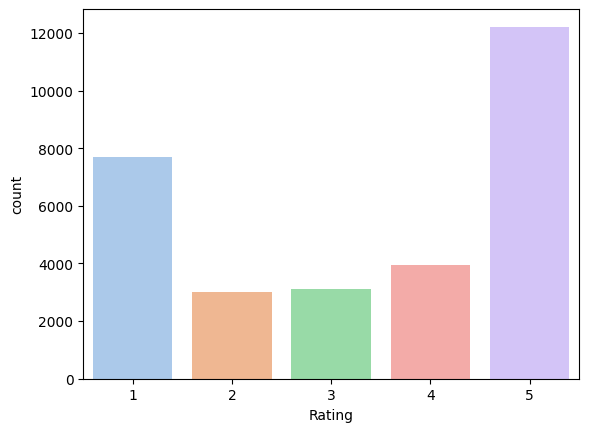

In [4]:
import seaborn as sns
sns.countplot(x='Rating', data=data, palette='pastel')

In [5]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


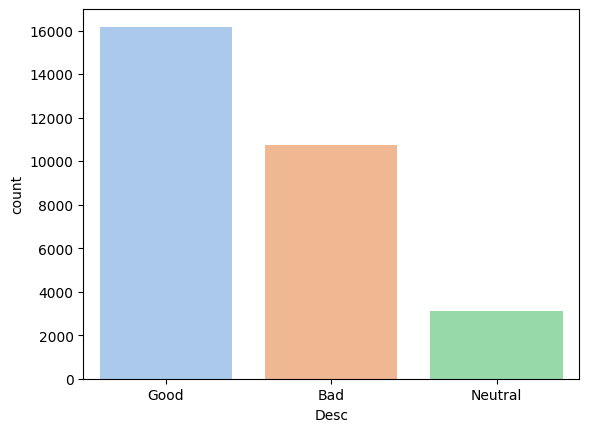

In [6]:
data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x='Desc', data=data, palette='pastel')
data.head()

<AxesSubplot: xlabel='length', ylabel='Total_thumbsup'>

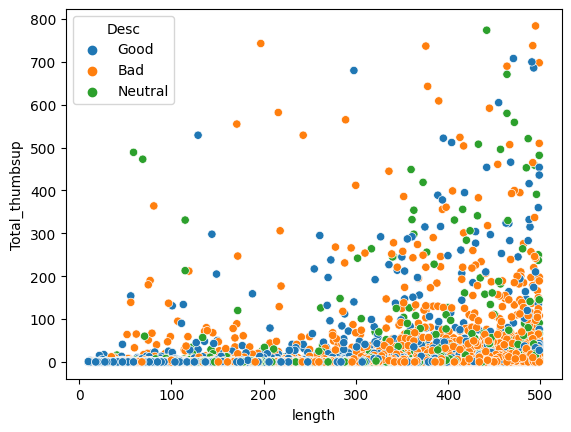

In [7]:
sns.scatterplot(x=data['length'][data.length < 500], 
y=data['Total_thumbsup'][data.Total_thumbsup < 800], 
hue=data['Desc'])

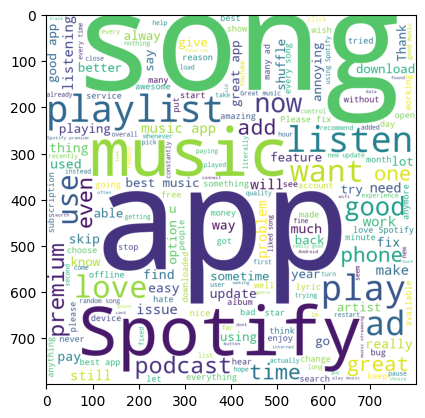

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = " ".join(data.loc[:,'Review'])
wordcloud = WordCloud(width = 800, height = 800, 
background_color ='white', 
min_font_size = 10).generate(reviews)
plt.imshow(wordcloud)

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda
x: " ".join(x.lower() for x in x.split()))
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda
word: re.sub('[^a-z A-Z 0-9-]+', '', word))
stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda
word: " ".join(word for word in word.split() if word not in
stop_words))
stemmer = PorterStemmer()
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda
word:" ".join(stemmer.stem(word) for word in word.split()))
data.head()["Review"] 

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [28]:
from sklearn.model_selection import train_test_split
X = data['Review']
y = data['Desc']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train

23321    recent download keep lage stuck fastest intern...
4550           found everyth want app im go premium afford
10422    love spotifi premium isnt good without premium...
5788     absolut hate app add irrit know tri forc peopl...
1934     pretti good queue option want go previou queu ...
                               ...                        
23992              dont problem find song navig app easili
27640    log select languag option haryanvi languag boy...
14501    servic great suggest shuffl song mani repeat f...
14555         great issu dont sleep timer option end queue
11590                          aw ok ipad cannot get mobil
Name: Review, Length: 22500, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 3238)	1
  (0, 3300)	2
  (0, 3915)	1
  (0, 5312)	1
  (0, 5667)	1
  (0, 5770)	1
  (0, 5771)	1
  (0, 8339)	1
  (0, 9393)	1
  (0, 9775)	1
  (0, 9847)	1
  (1, 795)	1
  (1, 1131)	1
  (1, 3698)	1
  (1, 4171)	1
  (1, 4487)	1
  (1, 5098)	1
  (1, 7952)	1
  (1, 11212)	1
  (2, 668)	1
  (2, 2147)	1
  (2, 3861)	1
  (2, 4517)	1
  (2, 5187)	1
  (2, 5412)	1
  :	:
  (22497, 6871)	1
  (22497, 7674)	2
  (22497, 7708)	1
  (22497, 8502)	1
  (22497, 8997)	1
  (22497, 9127)	1
  (22497, 9393)	3
  (22497, 9923)	1
  (22497, 10305)	1
  (22497, 10874)	1
  (22497, 11454)	1
  (22498, 3270)	1
  (22498, 3544)	1
  (22498, 4590)	1
  (22498, 5418)	1
  (22498, 7229)	1
  (22498, 8197)	1
  (22498, 9256)	1
  (22498, 10339)	1
  (22499, 1464)	1
  (22499, 2143)	1
  (22499, 4427)	1
  (22499, 5372)	1
  (22499, 6567)	1
  (22499, 7133)	1


In [13]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 9801)	0.1611680812424819
  (0, 9793)	0.15612197572933384
  (0, 9181)	0.09940095961304855
  (0, 9173)	0.07384292539111476
  (0, 9042)	0.12832673998126956
  (0, 9038)	0.06500640010175625
  (0, 8901)	0.0828600504737942
  (0, 8887)	0.03707729609945748
  (0, 8838)	0.11074853174017249
  (0, 8837)	0.06437317767121703
  (0, 8819)	0.08470155033089796
  (0, 8732)	0.05201377505308044
  (0, 8725)	0.060454261060461735
  (0, 8722)	0.0815413378680683
  (0, 8717)	0.07494175939929815
  (0, 8702)	0.10488867037127933
  (0, 8647)	0.09583967634662735
  (0, 8638)	0.08187599203306832
  (0, 8634)	0.055266156722047675
  (0, 8628)	0.04176657008898285
  (0, 8627)	0.12387021861371503
  (0, 8568)	0.042604713437173466
  (0, 8554)	0.03694541749374239
  (0, 8551)	0.07787888654926492
  (0, 8541)	0.07689791531386064
  :	:
  (22499, 4586)	0.10222268078880288
  (22499, 4117)	0.09649595741543592
  (22499, 4116)	0.08000342331319464
  (22499, 3362)	0.14399192796656132
  (22499, 3348)	0.057197384773171274
  (22499, 309

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random Forest Classifier on Count Vectors: {rf_cv}')

Random Forest Classifier on Count Vectors: 0.7738666666666667


In [15]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF: {rf_tfidf}')

Random Forest Classifier on TF-IDF: 0.7536


In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'M Naive Bayes Classifier on CV: {mnb_cv}')

M Naive Bayes Classifier on CV: 0.7758666666666667


In [17]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'M Naive Bayes Classifier on TF-IDF: {mnb_tfidf}')

M Naive Bayes Classifier on TF-IDF: 0.7593333333333333


In [18]:
model = {'Model':['RF-Count', 'RF-TFIDF', 
'MNB-Count','MNB-TFIDF'],
'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
}
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RF-Count,0.773867
1,RF-TFIDF,0.753600
2,MNB-Count,0.775867
3,MNB-TFIDF,0.759333


<AxesSubplot: xlabel='Score', ylabel='Model'>

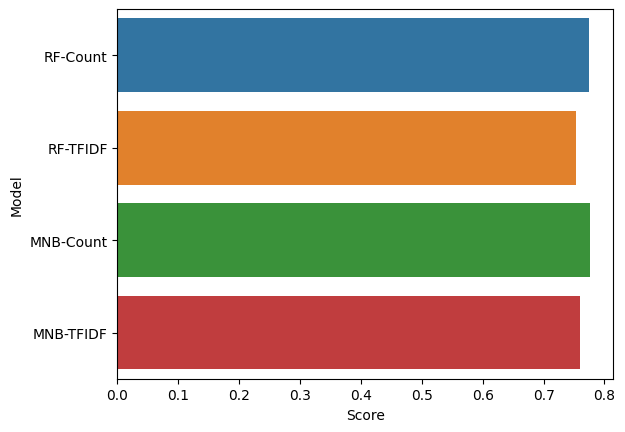

In [19]:
sns.barplot(data=model_df, y='Model', x='Score')

Text(0.5, 1.0, 'Confusion Matrix M NaiveBayes-Count')

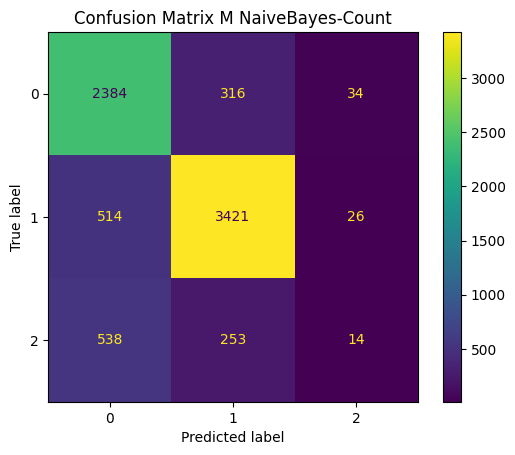

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(mnb1, 
X_test_count, y_test)
disp.ax_.set_title("Confusion Matrix M NaiveBayes-Count")

In [21]:
from sklearn.model_selection import GridSearchCV
mnb1_hyper = MultinomialNB()
parameters = {'alpha':[0.1, 0.5, 1.0, 4.0]}
clf = GridSearchCV(mnb1_hyper, parameters, cv=5, 
scoring='accuracy')
clf.fit(X_train_count, y_train)
print("best parameters: ",clf.best_params_)
mnb_hyper_cv = clf.score(X_test_count, y_test)
print(f' after hyper parameter: {mnb_hyper_cv}')

best parameters:  {'alpha': 4.0}
 after hyper parameter: 0.7784


In [22]:
from sklearn.model_selection import cross_val_score
mnb1_cross = MultinomialNB()
mnb_cross_cv = cross_val_score(mnb1_cross, X_train_count, 
y_train, cv=3, scoring='accuracy')
print(f'After Cross Validation: {mnb_cross_cv.mean()}')

After Cross Validation: 0.7765333333333334


In [23]:
model_after = {'Model': ['Before',
                         'Grid Search',
                         'CrossValidation',],
               'Score': [mnb_cv, mnb_hyper_cv,
                         mnb_cross_cv.mean()]
               }
model_after_df = pd.DataFrame(model_after)
model_after_df


,Model,Score
0,Before,0.775867
1,Grid Search,0.778400
2,CrossValidation,0.776533


In [33]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb1, f)
with open('transformer.pkl', 'wb') as f:
    pickle.dump(cv, f)
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f )

In [36]:
test_reviews = ['This is a great app!',
'No control options from my phones ',
'I like the song selection, but the ads are annoying',
'bad ui']
pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [37]:
result = pd.DataFrame({'Reviews':test_reviews, 
'Outcome': pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,No control options from my phones,Bad
2,"I like the song selection, but the ads are ann...",Neutral
3,bad ui,Bad


<AxesSubplot: xlabel='Outcome', ylabel='count'>

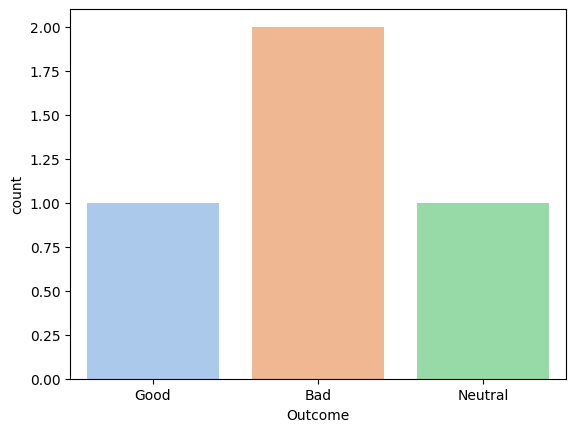

: 

In [38]:
sns.countplot(x='Outcome', data=result, palette='pastel')